In [1]:
# fname = '1801-P-01-51-009_origin-720A3-reset-origin.pdf'
# fname = 'F:/uhv/pdf/Unit51/1801-P-01-51-009-Model.pdf'

# ดู cell ที่มี #ตามด้วยตัวเลข

In [41]:
#1
import warnings
warnings.filterwarnings("ignore")
import csv
from tqdm.notebook import tqdm

In [42]:
#2
# my_roots_list//lippincottlibrary.wordpress.com/2020/02/05/python-find-files-with-os-walk/
import pandas as pd
import os
def list_files(filepath, filetype):
    paths = []
    roots = []
    path1 = []
    file1 = []
    path = ''
    for root, dirs, files in os.walk(filepath):
        for file in files:
            if file.lower().endswith(filetype.lower()) and os.path.isfile(os.path.join(root, file)):
                paths.append(os.path.join(root, file))
                roots.append(root)
                path = os.path.join(root, file)
                path1.append(path[path.find('/u',4,len(path)):])
                file1.append(file)
#                 print(os.path.isfile(os.path.join(root, file)),root,os.path.join(root, file),path[path.find('\\',4,len(path)):])
    return(roots,path1,paths,file1)

In [43]:
#3
def rmmk(dir): # remove exiting folder and remake folder
    import os
    import shutil

    if os.path.exists(dir):
        shutil.rmtree(dir)
    os.makedirs(dir)

In [44]:
#4
# src_dir = 'D:/Project_Piping_list/pdf'
src_dir = './pdf/uhv/pdf/'
my_roots_list,my_path_list,my_files_list,my_filenames_list = list_files(src_dir, '.pdf')

In [45]:
#5
file_df = pd.concat([pd.Series(my_files_list),pd.Series(my_roots_list),pd.Series(my_path_list),pd.Series(my_filenames_list)],axis=1)
file_df.columns = ['file','dir','path','file_name']
file_df['name'] = file_df.file_name.str[:-4]
file_df['unit'] = file_df.dir.str[-6:]
file_df.head()

,file,dir,path,file_name,name,unit
0,./pdf/uhv/pdf/unit01\9999-P-01-01-001-Model.pdf,./pdf/uhv/pdf/unit01,/uhv/pdf/unit01\9999-P-01-01-001-Model.pdf,9999-P-01-01-001-Model.pdf,9999-P-01-01-001-Model,unit01
1,./pdf/uhv/pdf/unit01\9999-P-01-01-002-Model.pdf,./pdf/uhv/pdf/unit01,/uhv/pdf/unit01\9999-P-01-01-002-Model.pdf,9999-P-01-01-002-Model.pdf,9999-P-01-01-002-Model,unit01
2,./pdf/uhv/pdf/unit01\9999-P-01-01-003-Model.pdf,./pdf/uhv/pdf/unit01,/uhv/pdf/unit01\9999-P-01-01-003-Model.pdf,9999-P-01-01-003-Model.pdf,9999-P-01-01-003-Model,unit01
3,./pdf/uhv/pdf/unit01\9999-P-01-01-004-Model.pdf,./pdf/uhv/pdf/unit01,/uhv/pdf/unit01\9999-P-01-01-004-Model.pdf,9999-P-01-01-004-Model.pdf,9999-P-01-01-004-Model,unit01
4,./pdf/uhv/pdf/unit01\9999-P-01-01-005-Model.pdf,./pdf/uhv/pdf/unit01,/uhv/pdf/unit01\9999-P-01-01-005-Model.pdf,9999-P-01-01-005-Model.pdf,9999-P-01-01-005-Model,unit01


In [12]:
#6
st = pd.Timestamp.now()
from PIL import Image 
Image.MAX_IMAGE_PIXELS = 1000000000
from pdf2image import convert_from_path
dpi = 288
img_folder = f'./images/{dpi}dpi'
rmmk(img_folder)

for i in tqdm(file_df.index):
    pdfs = file_df.file[i]
    pages = convert_from_path(pdfs,dpi)
    j = 1
    for page in pages:
        # image_name = img_folder + '\\' + file_df.name[i] + '_page'  + str(j) + '.jpg'
        image_name = os.path.join(img_folder, file_df.name[i]) + '.jpg'
        page.save(image_name, "jpeg", dpi=(dpi,dpi))
        # j += 1   
print(f'Time2SaveImages {pd.Timestamp.now()-st}')

  0%|          | 0/917 [00:00<?, ?it/s]

Time2SaveImages 0 days 00:15:28.965430


In [8]:
len(file_df[file_df.unit=='unit55'])

0

In [9]:
file_df.unit.unique()

array(['unit53'], dtype=object)

In [10]:
#6
st = pd.Timestamp.now()
from PIL import Image 
Image.MAX_IMAGE_PIXELS = 1000000000
from pdf2image import convert_from_path
dpi = 288
img_folder = f'F:/uhv/all_units/images'
rmmk(img_folder)

for i in tqdm(file_df.index):
    pdfs = file_df.file[i]
    pages = convert_from_path(pdfs,dpi)
    j = 1
    for page in pages:
        # image_name = img_folder + '\\' + file_df.name[i] + '_page'  + str(j) + '.jpg'
        image_name = os.path.join(img_folder, file_df.name[i]) + '.jpg'
        page.save(image_name, "jpeg", dpi=(dpi,dpi))
        # j += 1   
print(f'Time2SaveImages {pd.Timestamp.now()-st}')

PermissionError: [WinError 21] The device is not ready: 'F:/'

In [ ]:
#6 แยก unit
st = pd.Timestamp.now()
from PIL import Image 
Image.MAX_IMAGE_PIXELS = 1000000000
from pdf2image import convert_from_path
dpi = 288
img_folder = f'F:/uhv/all_units/images/{dpi}dpi'
units = file_df.unit.unique()
rmmk(img_folder)

for unit in tqdm(units):
    rmmk(os.path.join(img_folder,unit))
    for name in tqdm(file_df[file_df.unit==unit].name):
        pdfs = file_df[file_df.name==name].file.item()
        # print(unit, name)
        pages = convert_from_path(pdfs,dpi)
        j = 1
        for page in pages:
            # image_name = img_folder + '\\' + file_df.name[i] + '_page'  + str(j) + '.jpg'
            image_name = os.path.join(img_folder, unit, name) + '.jpg'
            page.save(image_name, "jpeg", dpi=(dpi,dpi))
            # j += 1   
print(f'Time2SaveImages {pd.Timestamp.now()-st}')

In [48]:
#7.2
# สร้าง annotation ทั้ง excel และ txt แยกว่าอันไหนเป็น pipe
st = pd.Timestamp.now()
import csv
import fitz
dpi = 288
annot_folder = f'./annotations/{dpi}dpi'
rmmk(annot_folder)
rmmk(annot_folder+'/txt')

ratio = dpi/72 # 360 dpi use 5, 720 dpi use 10 refer to pdf use 72 dpi for rectangle bbox

for i in tqdm(file_df.index):
    annot_df = pd.DataFrame()
    annot_df1 = pd.DataFrame()
    doc = fitz.open(file_df.file[i])
    page = doc[0]
    j=1
    for annot in page.annots():
        # print(annot.info['content'],annot.rect)
        tx = annot.info['content']
        if ('"-' in tx or '"' in tx[1:5]) and len(tx)>4 and len(tx)<30 and (tx[0].isdigit() or '(' in tx[0]) and tx.count('-')>1 and \
            ')' not in tx[:-1] and '(' not in tx[1:]:
            annot_df = annot_df.append(pd.concat([pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[3]*ratio)),                                                    
                                                    pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[3]*ratio)),
                                                    pd.Series(annot.info['content']).str.strip().str.replace('%%U','').replace('%%u',''),
                                                    pd.Series(True),
                                                    pd.Series(j)],axis=1))

            annot_df1 = annot_df1.append(pd.concat([pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[3]*ratio)),                                                    
                                                    pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[3]*ratio)),
                                                    pd.Series(annot.info['content'])],axis=1))
            j+=1           
        else:
             annot_df = annot_df.append(pd.concat([pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[3]*ratio)),                                                    
                                                    pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[3]*ratio)),
                                                    pd.Series(annot.info['content']).str.strip().str.replace('%%U','').replace('%%u',''),
                                                    pd.Series(False),
                                                    pd.Series(None)],axis=1))

             annot_df1 = annot_df1.append(pd.concat([pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[1]*ratio)),
                                                    pd.Series(int(annot.rect[2]*ratio)),pd.Series(int(annot.rect[3]*ratio)),                                                    
                                                    pd.Series(int(annot.rect[0]*ratio)),pd.Series(int(annot.rect[3]*ratio)),
                                                    pd.Series('###')],axis=1))    
    try:
        annot_df.columns = ['tlx','tly','trx','try','brx','bry','blx','bly','text','pipe','id']
        annot_df1.columns = ['tlx','tly','trx','try','brx','bry','blx','bly','text']
    except:
        pass
    annot_df.reset_index(drop=True,inplace=True)
    annot_df = annot_df[['id','text','pipe','tlx','tly','trx','try','brx','bry','blx','bly']]
    annot_df.to_excel(annot_folder + '/' + file_df.name[i] + '.xlsx',index=False)
    annot_df1.reset_index(drop=True,inplace=True)
    annot_df1.to_csv(annot_folder + '/txt/gt_' + file_df.name[i] + '.txt',index=False,header=False,quoting=csv.QUOTE_NONE)

print(f'Time2SaveImages {pd.Timestamp.now()-st}')

  0%|          | 0/917 [00:00<?, ?it/s]

Time2SaveImages 0 days 00:37:09.803406


In [49]:
# annot_folder = f'F:/uhv/all_units/annotations/{dpi}dpi'
src_dir= annot_folder
files = [ f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir,f)) ]
files.sort()
df_all = pd.DataFrame()
for f in tqdm(files):
    df = pd.read_excel(os.path.join(src_dir,f))
    df['unit'] = file_df[file_df.name==f[:-5]].unit.item()
    df['name'] = f[:-5]
    df_all = df_all.append(df)
dst_dir = os.path.join(src_dir,'all')
rmmk(dst_dir)
df_all.reset_index(drop=True,inplace=True)
df_all.to_excel(os.path.join(dst_dir,'annot_all.xlsx'), index=False)

  0%|          | 0/917 [00:00<?, ?it/s]

In [23]:
df_all.unit.unique()

array(['unit51', 'unit52', 'unit59', 'unit53', 'unit54', 'unit55',
       'unit56', 'unit57', 'unit58', 'unit70', 'unit71', 'unit72',
       'unit73', 'unit74', 'unit75', 'unit80', 'unit77', 'unit78',
       'unit79', 'unit01'], dtype=object)

In [25]:
df_all[df_all.unit=='unit80']

,tlx,tly,trx,try,brx,bry,blx,bly,text,pipe,id,unit,name
331233,1724,780,1840,780,1840,820,1724,820,REDUCTION,False,NaN,unit80,1812-P-01-80-001-1_Z-Model
331234,1748,808,1816,808,1816,848,1748,848,GEAR,False,NaN,unit80,1812-P-01-80-001-1_Z-Model
331235,2052,632,2172,632,2172,672,2052,672,GENERATOR,False,NaN,unit80,1812-P-01-80-001-1_Z-Model
331236,3996,64,4224,64,4224,104,3996,104,GENERAL NOTES,False,NaN,unit80,1812-P-01-80-001-1_Z-Model
331237,3996,556,4096,556,4096,596,3996,596,NOTES,False,NaN,unit80,1812-P-01-80-001-1_Z-Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333094,4504,2264,4544,2264,4544,2300,4504,2300,NW,False,NaN,unit80,1812-P-01-80-371-1_Z-Model
333095,4624,2264,4660,2264,4660,2300,4624,2300,WT,False,NaN,unit80,1812-P-01-80-371-1_Z-Model
333096,4664,2264,4700,2264,4700,2300,4664,2300,TT,False,NaN,unit80,1812-P-01-80-371-1_Z-Model
333097,2348,1132,2388,1132,2388,1176,2348,1176,"2""",False,NaN,unit80,1812-P-01-80-371-1_Z-Model


# End of extraction

In [50]:
import numpy as np
import cv2

./images/288dpi\9999-P-01-01-041-Model.jpg


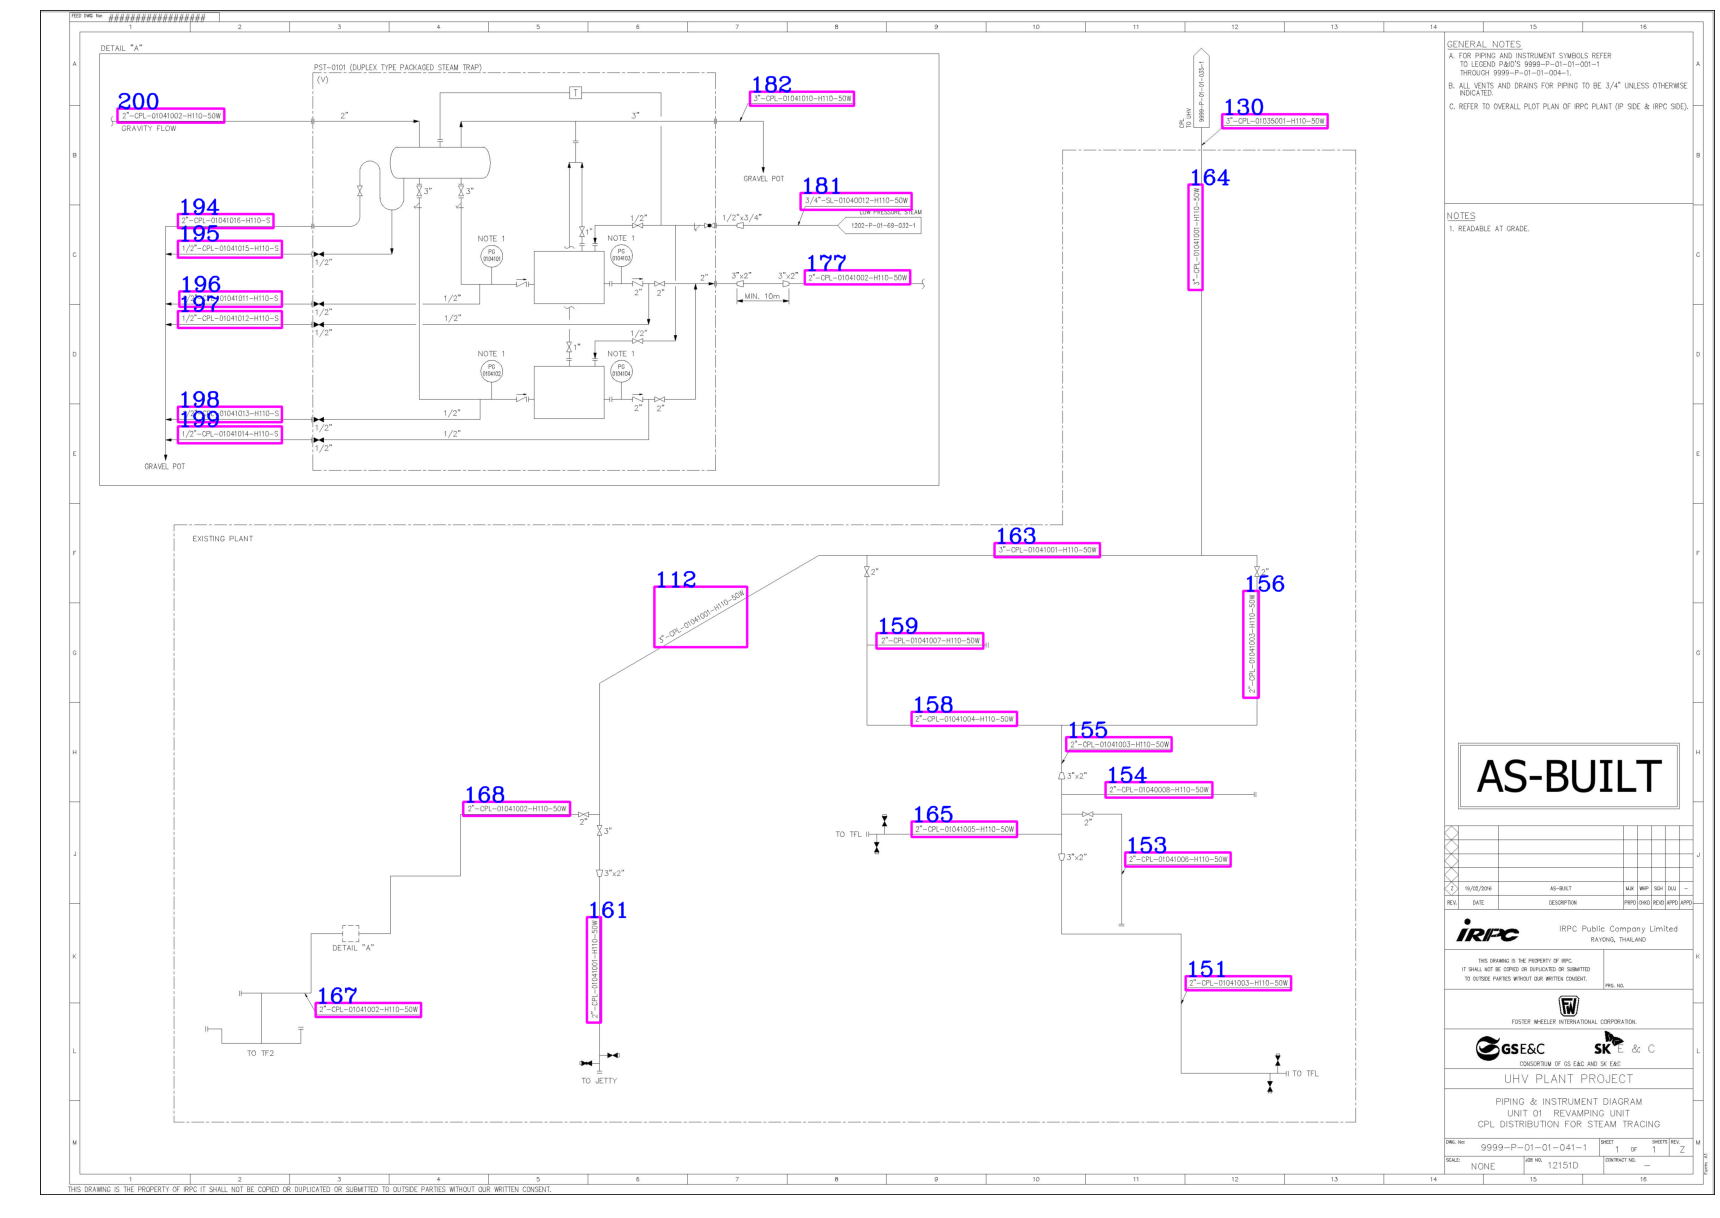

In [52]:
#showภาพที่cutพร้อมbbox
import matplotlib.pyplot as plt
import cv2
import numpy as np
dpi = 288
image_nb = -1
suffix = ''
# src_dir = f'F:/uhv/all_units/images/{dpi}dpi/unit55'
src_dir = f'./images/{dpi}dpi'
files = [ f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir,f)) ]
files.sort()
img_dir = src_dir #f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/{dpi}dpi/masked_cut'
annot_dir = f'./annotations/{dpi}dpi/txt'
annot_mc_df = pd.read_csv(os.path.join(annot_dir,'gt_'+files[image_nb][:-4]+f'{suffix}.txt'),header=None) # annotation masked and cut
annot_mc_df.columns = ['tlx','tly','trx','try','brx','bry','blx','bly','text']
im = plt.imread(os.path.join(img_dir,files[image_nb][:-4]+f'{suffix}.jpg'))
img = im.copy()
font = cv2.FONT_HERSHEY_COMPLEX

for i in range(len(annot_mc_df)):
    samp = annot_mc_df.iloc[[i]]
    bbox = np.concatenate((samp.tlx.values,samp.tly.values,samp.brx.values,samp.bry.values),axis=0)
    # print(samp)
    scale = 1
    bbox_upscale = bbox*scale
    bbox1 = bbox_upscale.tolist()
    y0 = int(bbox1[1])
    y1 = int(bbox1[3])
    x0 = int(bbox1[0])
    x1 = int(bbox1[2])
    if samp.text.item() != '###':
        cv2.rectangle(img, (x0, y0), (x1, y1), (255,0,255), 5)        
        cv2.putText(img,str(i),(x0,y0),font,2,(0,0,255),3)  #text,coordinate,font,size of text,color,thickness of font
    # else:
    #     cv2.rectangle(img, (x0, y0), (x1, y1), (0,0,255), 5)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
print(os.path.join(img_dir,files[image_nb]))

In [25]:
#showภาพที่cutพร้อมbbox อ่านภาพจาก folder ย่อย
def write_bbox(src_dir,dst_dir,unit,name):
    
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np
    dpi = 288    
    annot_mc_df = df_all[(df_all.unit==unit) & (df_all.name==name)].copy()
    
    im = plt.imread(os.path.join(src_dir,name+'.jpg'))
    img = im.copy()

    for i in range(len(annot_mc_df[annot_mc_df['pipe']==True])):
        samp = annot_mc_df[annot_mc_df['pipe']==True].iloc[[i]]
        bbox = np.concatenate((samp.tlx.values,samp.tly.values,samp.brx.values,samp.bry.values),axis=0)
        scale = 1
        bbox_upscale = bbox*scale
        bbox1 = bbox_upscale.tolist()
        y0 = int(bbox1[1])
        y1 = int(bbox1[3])
        x0 = int(bbox1[0])
        x1 = int(bbox1[2])
        if samp.text.item() != '###':
            cv2.rectangle(img, (x0, y0), (x1, y1), (255,0,255), 5)
    plt.imsave(os.path.join(dst_dir,name+'_bbox.jpg'),img)
    # return im, img

dpi = 288
units = file_df.unit.unique()
# rmmk(f'F:/uhv/all_units/bbox/{dpi}dpi')
rmmk(f'./bbox/{dpi}dpi')
for unit in tqdm(units):
    src_dir = os.path.join(f'./images/{dpi}dpi',unit)
    dst_dir = os.path.join(f'./bbox/{dpi}dpi',unit)    
    rmmk(dst_dir)
    for name in tqdm(file_df[file_df.unit==unit].name.unique()):
        write_bbox(src_dir,dst_dir,unit,name)
        

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
df_all[(df_all.unit==unit) & (df_all.name==name)]

,tlx,tly,trx,try,brx,bry,blx,bly,text,pipe,id,unit,name
22556,552,32,584,32,584,68,552,68,2,False,NaN,unit51,1801-P-01-51-551-Model
22557,836,32,864,32,864,68,836,68,3,False,NaN,unit51,1801-P-01-51-551-Model
22558,3380,32,3420,32,3420,68,3380,68,12,False,NaN,unit51,1801-P-01-51-551-Model
22559,3664,32,3704,32,3704,68,3664,68,13,False,NaN,unit51,1801-P-01-51-551-Model
22560,3944,32,3984,32,3984,68,3944,68,14,False,NaN,unit51,1801-P-01-51-551-Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22893,4504,2280,4544,2280,4544,2312,4504,2312,NR,False,NaN,unit51,1801-P-01-51-551-Model
22894,4544,2280,4580,2280,4580,2312,4544,2312,SP,False,NaN,unit51,1801-P-01-51-551-Model
22895,4044,2276,4140,2276,4140,2316,4044,2316,16/06/2021,False,NaN,unit51,1801-P-01-51-551-Model
22896,4248,2276,4404,2276,4404,2316,4248,2316,CSC/CSO REGISTERED,False,NaN,unit51,1801-P-01-51-551-Model


In [37]:
annot_mc_df = df_all[(df_all.unit==unit) & (df_all.name==name)]
samp = annot_mc_df[annot_mc_df['pipe']==True]
samp

,tlx,tly,trx,try,brx,bry,blx,bly,text,pipe,id,unit,name
22833,832,816,880,816,880,1068,832,1068,"3/4""-NL-51551001-A16",True,0.0,unit51,1801-P-01-51-551-Model
22834,572,1232,808,1232,808,1272,572,1272,"1""-GCH-51551015-N14",True,1.0,unit51,1801-P-01-51-551-Model
22835,624,1164,852,1164,852,1204,624,1204,"1""-GV-51551002-A16",True,2.0,unit51,1801-P-01-51-551-Model
22837,788,1488,1028,1488,1028,1528,788,1528,"1""-GCH-51551014-N14",True,3.0,unit51,1801-P-01-51-551-Model
22840,160,996,416,996,416,1040,160,1040,"3/4""-AIP-51361003-A16",True,4.0,unit51,1801-P-01-51-551-Model
22845,1352,760,1600,760,1600,804,1352,804,"3/4""-NL-51551031-N14",True,5.0,unit51,1801-P-01-51-551-Model
22846,1368,900,1608,900,1608,940,1368,940,"1""-GCH-51551004-N14",True,6.0,unit51,1801-P-01-51-551-Model
22850,1824,900,2060,900,2060,940,1824,940,"1""-GCH-51551051-N14",True,7.0,unit51,1801-P-01-51-551-Model
22852,2044,544,2268,544,2268,584,2044,584,"2""-GV-51551001-N14",True,8.0,unit51,1801-P-01-51-551-Model
22853,1904,740,2144,740,2144,780,1904,780,"1""-GCH-51551052-N14",True,9.0,unit51,1801-P-01-51-551-Model


In [53]:
#showภาพที่cutพร้อมbbox อ่านภาพจากภาพที่อยู่รวมกันใน folder เดียวกัน
def write_bbox(src_dir,dst_dir,unit,name):
    
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np
    dpi = 288    
    annot_mc_df = df_all[(df_all.unit==unit) & (df_all.name==name)].copy()
    font = cv2.FONT_HERSHEY_COMPLEX
    
    im = plt.imread(os.path.join(src_dir,name+'.jpg'))
    img = im.copy()

    for i in range(len(annot_mc_df[annot_mc_df['pipe']==True])):
        samp = annot_mc_df[annot_mc_df['pipe']==True].iloc[[i]]
        bbox = np.concatenate((samp.tlx.values,samp.tly.values,samp.brx.values,samp.bry.values),axis=0)
        scale = 1
        bbox_upscale = bbox*scale
        bbox1 = bbox_upscale.tolist()
        y0 = int(bbox1[1])
        y1 = int(bbox1[3])
        x0 = int(bbox1[0])
        x1 = int(bbox1[2])
        # if samp.text.item() != '###':
        if samp.text.item() != '###':
            cv2.rectangle(img, (x0, y0), (x1, y1), (255,0,255), 5)
            cv2.putText(img,str(i+1),(x0,y0),font,2,(0,0,255),3)
    plt.imsave(os.path.join(dst_dir,name+'_bbox.jpg'),img)
    # return im, img

dpi = 288
units = file_df.unit.unique()
rmmk(f'./bbox/{dpi}dpi')
for unit in tqdm(units):
    src_dir = os.path.join(f'./images/{dpi}dpi')
    dst_dir = os.path.join(f'./bbox/{dpi}dpi',unit)    
    rmmk(dst_dir)
    for name in tqdm(file_df[file_df.unit==unit].name.unique()):
        write_bbox(src_dir,dst_dir,unit,name)
        

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

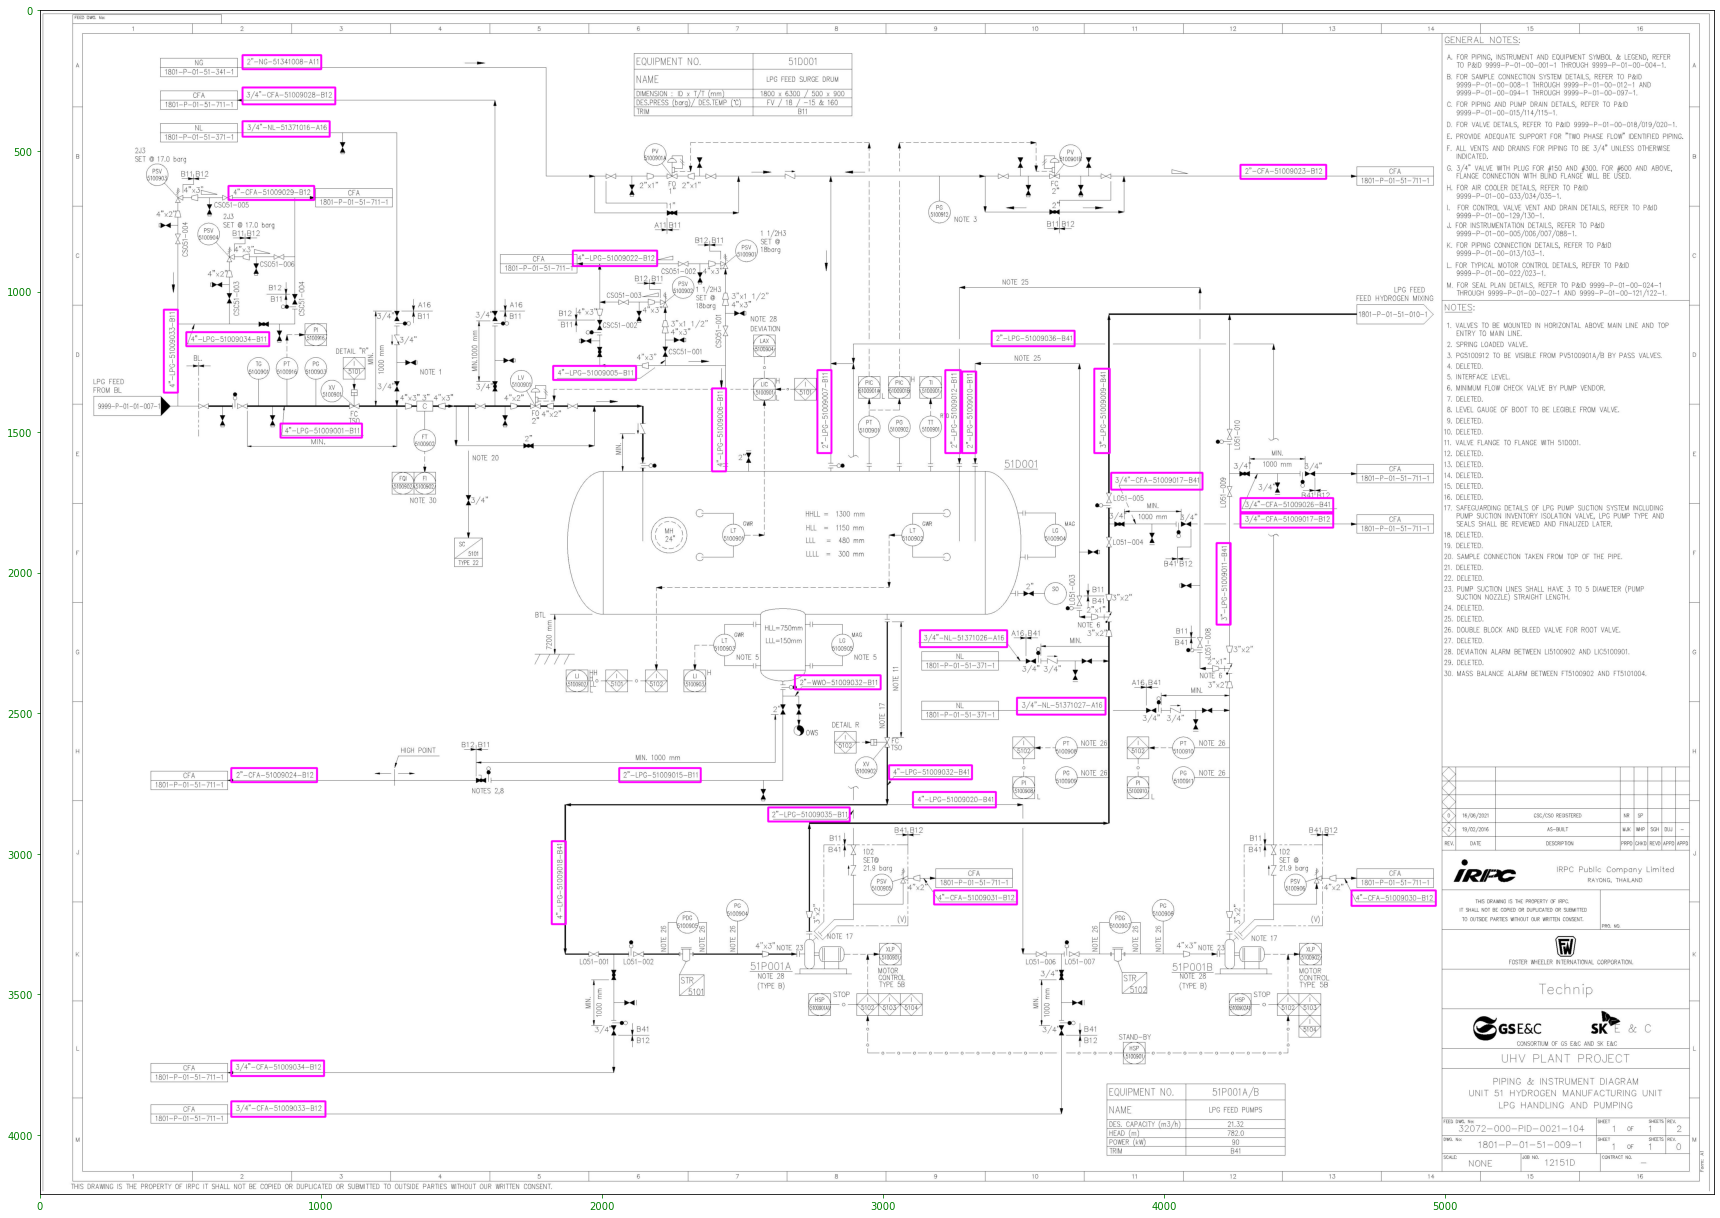

In [246]:
#showภาพA3พร้อมbbox
dpi = 360
image_nb = 0 #ภาพที่เท่าไร
src_dir = f'F:/uhv/imgs/{dpi}dpi'
files = [ f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir,f)) ]
img_dir = src_dir
annot_dir = f'F:/uhv/annotations/{dpi}dpi'
annot_mc_df = pd.read_excel(os.path.join(annot_dir,files[image_nb][:-3]+'xlsx')) # annotation
# annot_mc_df.columns = ['tlx','tly','trx','try','brx','bry','blx','bly','text']
im = plt.imread(os.path.join(img_dir,files[image_nb]))
img = im.copy()
h,w,c = img.shape
for i in range(len(annot_mc_df)):
    samp = annot_mc_df.iloc[[i]]
    bbox = np.concatenate((samp.tlx.values,samp.tly.values,samp.brx.values,samp.bry.values),axis=0)
    # print(samp)
    scale = 1
    bbox_upscale = bbox*scale
    bbox1 = bbox_upscale.tolist()
    y0 = int(bbox1[1])
    y1 = int(bbox1[3])
    x0 = int(bbox1[0])
    x1 = int(bbox1[2])
    cv2.rectangle(img, (x0, y0), (x1, y1), (255,0,255), 5)
# cv2.line(img,(w//2,0),(w//2,h), (255,0,0), 5)
# cv2.line(img,(0,h//2),(w,h//2), (255,0,0), 5)
# cv2.rectangle(img,(w//3,0),(w*2//3,h),(0,255,255),5)
# cv2.rectangle(img,(0,h//3),(w,h*2//3),(0,0,255),5)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
# plt.savefig('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithlines.jpg',dpi=360)
# plt.savefig('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithvh.jpg',dpi=360)
# plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithlines_noticks.jpg',img)
plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_noticks.jpg',img)

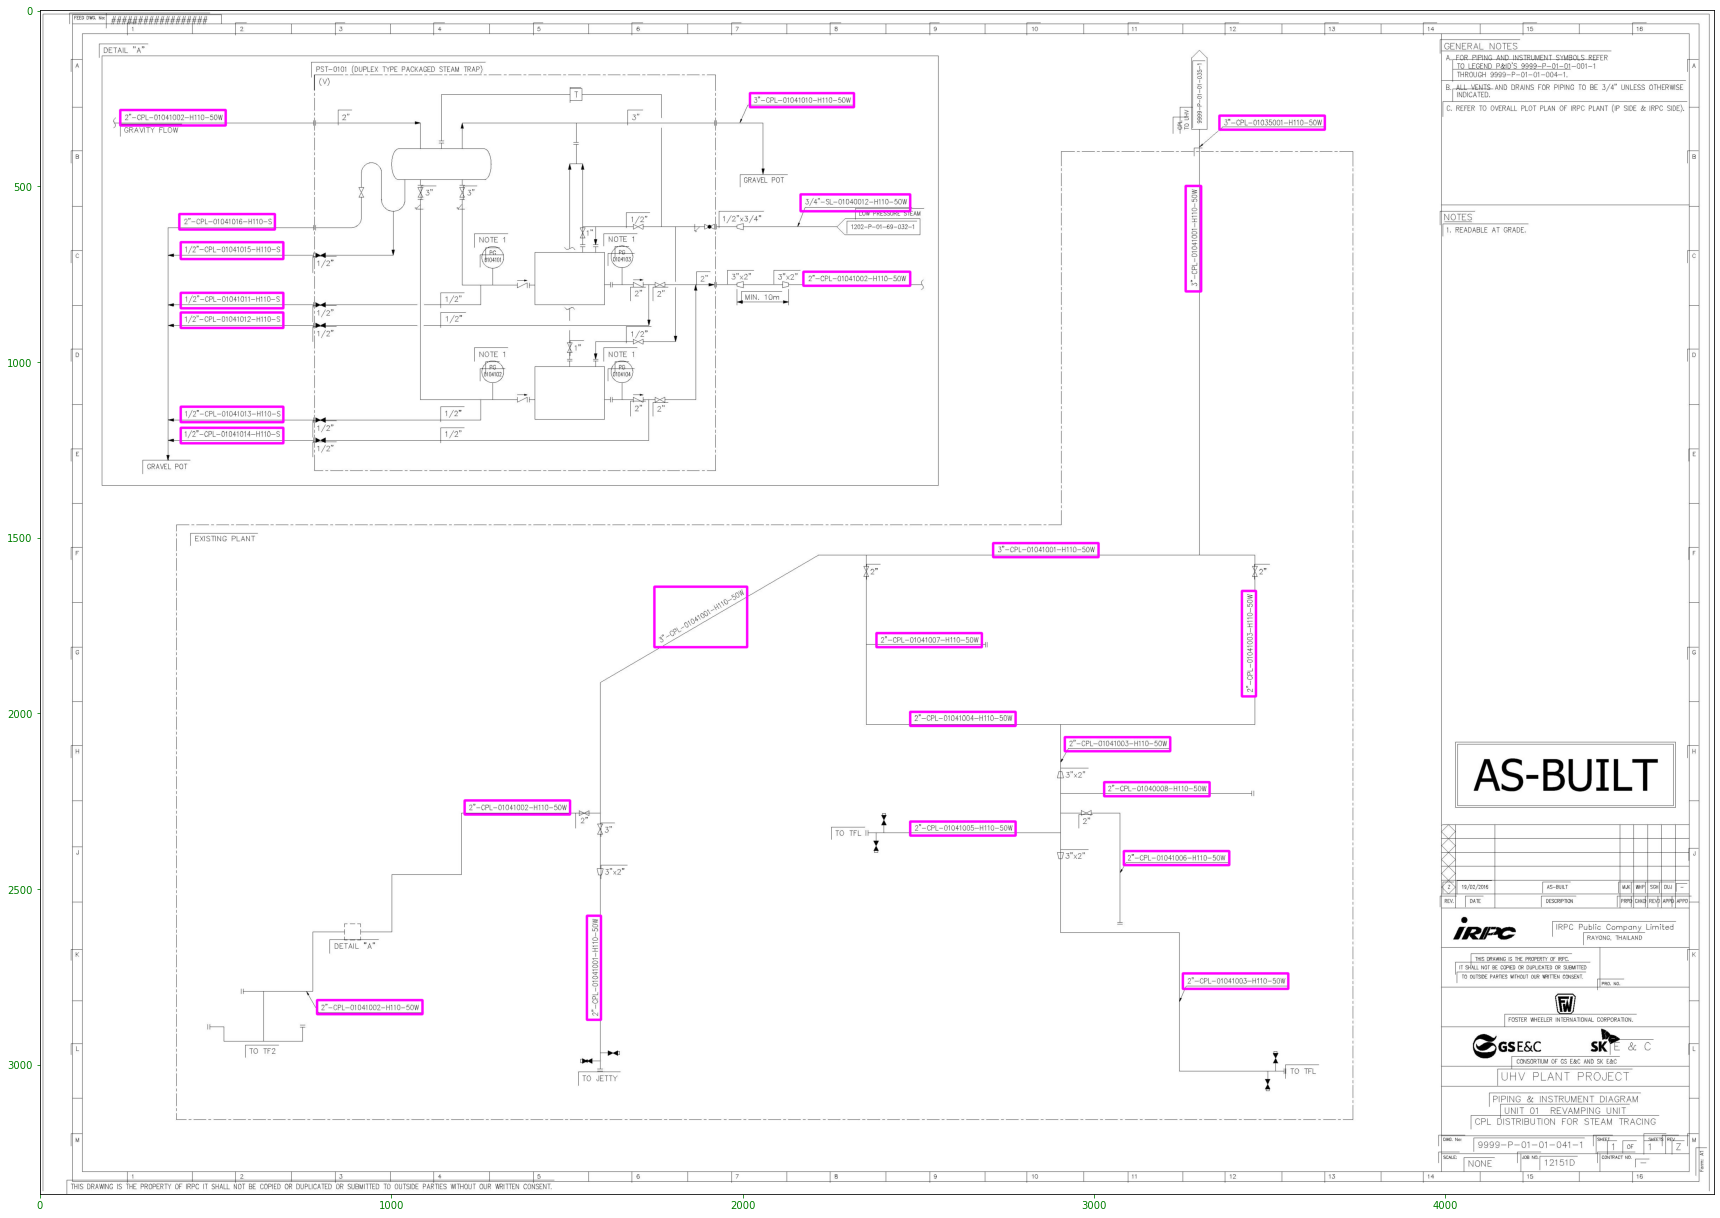

In [69]:
#showภาพA3พร้อมbbox
dpi = 288
image_nb = -1 #ภาพที่เท่าไร
src_dir = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/{dpi}dpi'
files = [ f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir,f)) ]
files.sort()
img_dir = src_dir
annot_dir = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/annotations/{dpi}dpi'
annot_mc_df = pd.read_excel(os.path.join(annot_dir,files[image_nb][:-3]+'xlsx')) # annotation
# annot_mc_df.columns = ['tlx','tly','trx','try','brx','bry','blx','bly','text']
im = plt.imread(os.path.join(img_dir,files[image_nb]))
img = im.copy()
h,w,c = img.shape
for i in range(len(annot_mc_df)):
    samp = annot_mc_df.iloc[[i]]
    bbox = np.concatenate((samp.tlx.values,samp.tly.values,samp.brx.values,samp.bry.values),axis=0)
    # print(samp)
    scale = 1
    bbox_upscale = bbox*scale
    bbox1 = bbox_upscale.tolist()
    y0 = int(bbox1[1])
    y1 = int(bbox1[3])
    x0 = int(bbox1[0])
    x1 = int(bbox1[2])
    if samp.text.item() != '###':
        cv2.rectangle(img, (x0, y0), (x1, y1), (255,0,255), 5)
    # else:
    #     cv2.rectangle(img, (x0, y0), (x1, y1), (0,0,255), 5)
# cv2.line(img,(w//2,0),(w//2,h), (255,0,0), 5)
# cv2.line(img,(0,h//2),(w,h//2), (255,0,0), 5)
# cv2.rectangle(img,(w//3,0),(w*2//3,h),(0,255,255),5)
# cv2.rectangle(img,(0,h//3),(w,h*2//3),(0,0,255),5)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
# plt.savefig('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithlines.jpg',dpi=360)
# plt.savefig('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithvh.jpg',dpi=360)
# plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithlines_noticks.jpg',img)
# plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_noticks.jpg',img)

In [12]:
annot_mc_df.head(3)

,Unnamed: 0,tlx,tly,trx,try,brx,bry,blx,bly,text
0,0,556,36,588,36,588,72,556,72,###
1,1,840,36,868,36,868,72,840,72,###
2,2,3372,36,3412,36,3412,72,3372,72,###


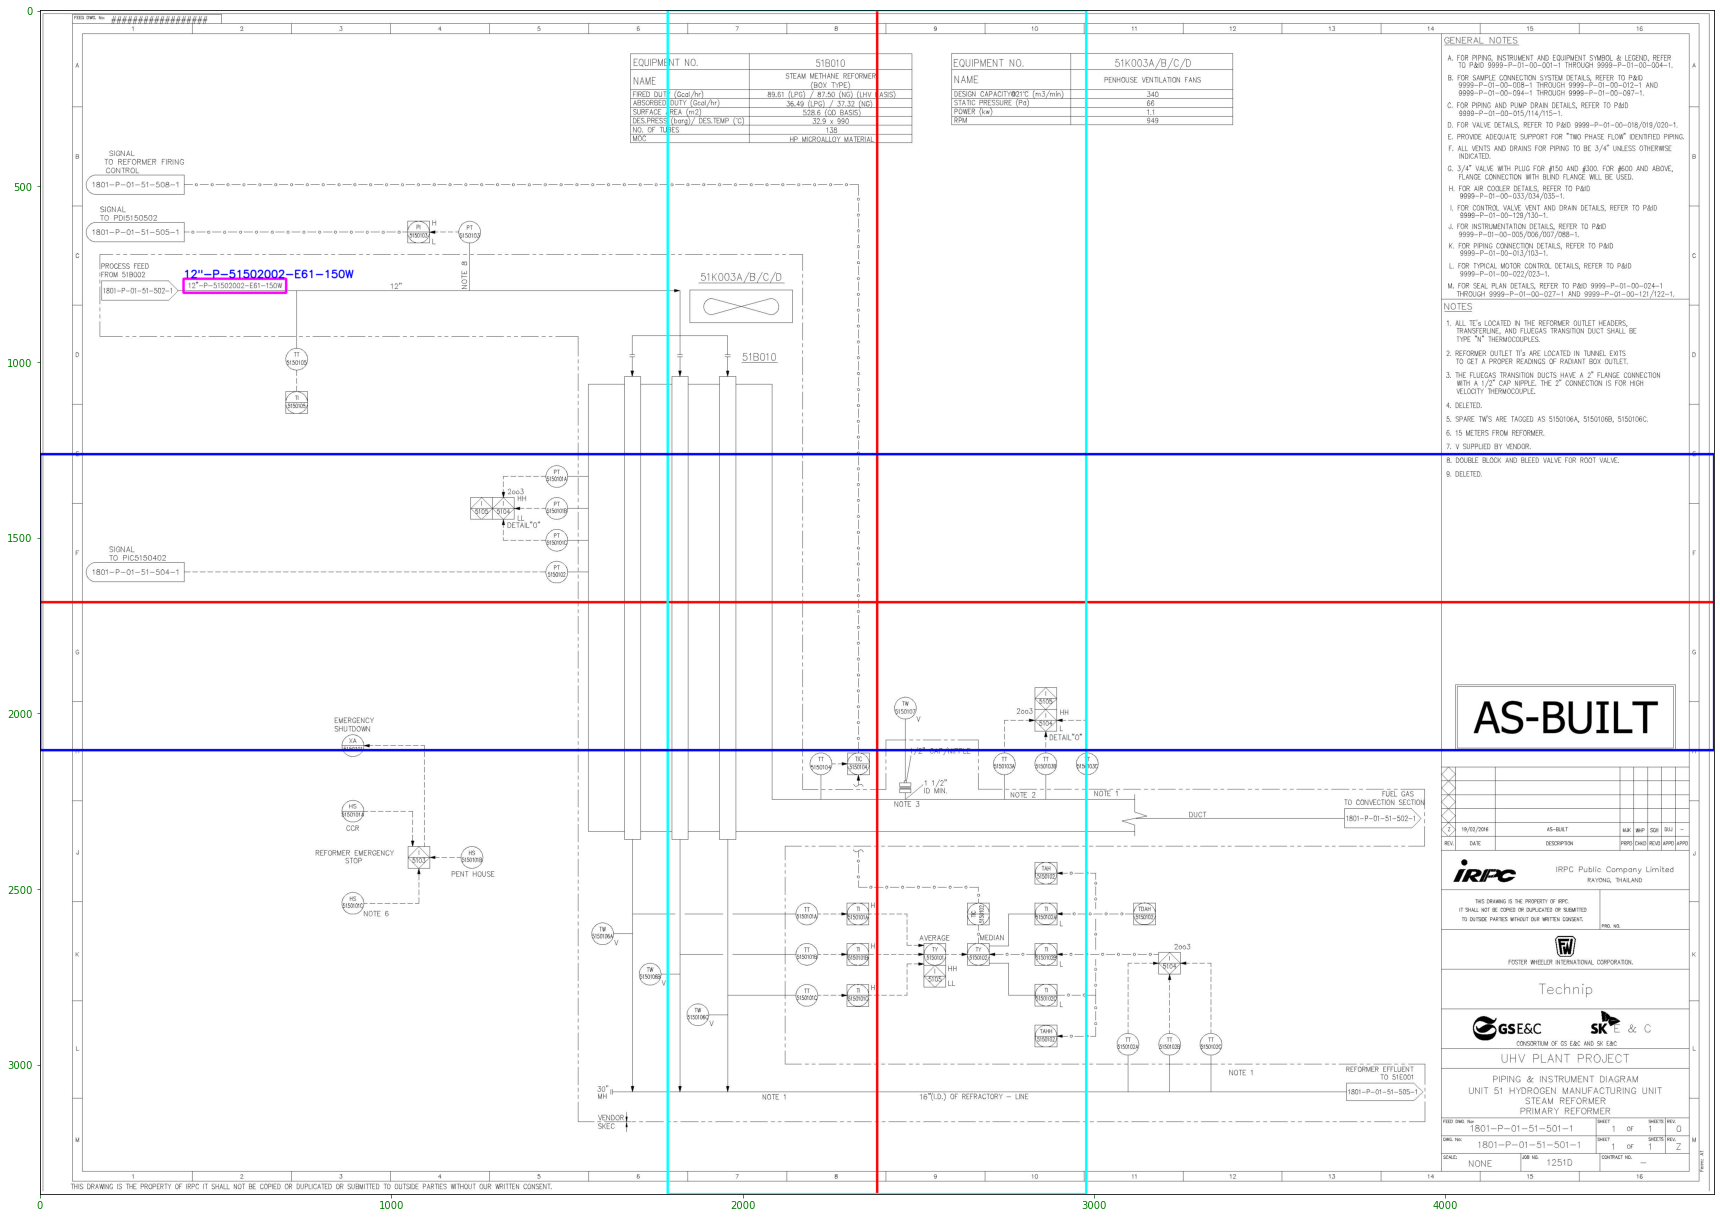

In [10]:
#showภาพA3พร้อมbboxและannotation
dpi = 288
image_nb = 26 #ภาพที่เท่าไร
src_dir = f'F:/uhv/imgs/{dpi}dpi'
files = [ f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir,f)) ]
img_dir = src_dir
annot_dir = f'F:/uhv/annotations/{dpi}dpi'
annot_mc_df = pd.read_excel(os.path.join(annot_dir,files[image_nb][:-3]+'xlsx')) # annotation
# annot_mc_df.columns = ['tlx','tly','trx','try','brx','bry','blx','bly','text']
im = plt.imread(os.path.join(img_dir,files[image_nb]))
img = im.copy()
h,w,c = img.shape
for i in range(len(annot_mc_df)):
    samp = annot_mc_df.iloc[[i]]
    bbox = np.concatenate((samp.tlx.values,samp.tly.values,samp.brx.values,samp.bry.values),axis=0)
    # print(samp)
    scale = 1
    bbox_upscale = bbox*scale
    bbox1 = bbox_upscale.tolist()
    y0 = int(bbox1[1])
    y1 = int(bbox1[3])
    x0 = int(bbox1[0])
    x1 = int(bbox1[2])
    if samp.text.item() != '###':
        cv2.rectangle(img, (x0, y0), (x1, y1), (255,0,255), 5)
        
        # font
        font = cv2.FONT_HERSHEY_SIMPLEX  
        # org
        org = (x0, y0-3)  
        # fontScale
        fontScale = 1   
        # Blue color in BGR
        color = (0, 0, 255)  
        # Line thickness of 2 px
        thickness = 2   
        # Using cv2.putText() method
        text = samp.text.item()
        cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)

cv2.line(img,(w//2,0),(w//2,h), (255,0,0), 5)
cv2.line(img,(0,h//2),(w,h//2), (255,0,0), 5)

# cv2.rectangle(img,(w//3,0),(w*2//3,h),(0,255,255),5)
# cv2.rectangle(img,(0,h//3),(w,h*2//3),(0,0,255),5)

# cv2.rectangle(img,(w*1//8,0),(w*7//8,h),(0,255,255),5)
# cv2.rectangle(img,(w*2//8,0),(w*6//8,h),(0,255,255),5)
cv2.rectangle(img,(w*3//8,0),(w*5//8,h),(0,255,255),5)

cv2.rectangle(img,(0,h*3//8),(w,h*5//8),(0,0,255),5)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
# plt.savefig('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithlines.jpg',dpi=360)
# plt.savefig('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithvh.jpg',dpi=360)
# plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_bboxwithlines_noticks.jpg',img)

# plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_noticks.jpg',img)
# plt.imsave('F:/uhv/outputs/1801-P-01-51-009-Model_bbox_annotation_noticks.jpg',img)

In [70]:
#10.1
#Random to train/test dataset
import os
import shutil
import random
import numpy as np
import pandas as pd

dpi = 288
src_folder = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/{dpi}dpi/masked_cut'
textdet_img_dir = '/home/adminroot/data/project/textdet/imgs'
train_img = textdet_img_dir + '/training'
test_img = textdet_img_dir + '/test'

src_ann_folder = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/annotations/{dpi}dpi/excel_masked_cut'
textdet_ann_dir = '/home/adminroot/data/project/textdet/annotations'
train_ann = textdet_ann_dir + '/training'
test_ann = textdet_ann_dir + '/test'

rmmk(textdet_img_dir)
rmmk(textdet_ann_dir)
rmmk(train_img)
rmmk(test_img)
rmmk(train_ann)
rmmk(test_ann)

files = [ f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder,f)) ]
files.sort()
# rndnums = list(random.sample(range(0, len(files)), len(files)))
# rnd_df = pd.DataFrame(pd.concat([pd.Series(rndnums,name='idx'),pd.Series(files,name='fname').str[:-4]],axis=1))
# rnd_df.set_index('idx',inplace=True)
# rnd_df
# for i in tqdm_notebook(files):
random.shuffle(files)
qty = len(files)
pct_tr = 0.8 # Percentage of training
for f in files[:int(qty*pct_tr)]:
    # print(f)
    shutil.copy(os.path.join(src_folder,f),os.path.join(train_img,f))
    shutil.copy(os.path.join(src_ann_folder,'gt_'+f[:-3]+'txt'),os.path.join(train_ann,'gt_'+f[:-3]+'txt'))
for f in files[int(qty*pct_tr):]:
    # print(f)
    shutil.copy(os.path.join(src_folder,f),os.path.join(test_img,f))
    shutil.copy(os.path.join(src_ann_folder,'gt_'+f[:-3]+'txt'),os.path.join(test_ann,'gt_'+f[:-3]+'txt'))

### จบ

# เตรียม icdar 2015 text recognition dataset

In [28]:
ann_df[ann_df.text == '6"-P-52025015-H229-100D']

,Unnamed: 0,tlx,tly,trx,try,brx,bry,blx,bly,text
189,189,900,896,940,896,940,1112,900,1112,"6""-P-52025015-H229-100D"
190,190,916,900,928,900,928,904,916,904,"6""-P-52025015-H229-100D"


In [29]:
dpi = 288
img_dir = f'F:/uhv/imgs/{dpi}dpi'
ann_dir = f'F:/uhv/annotations/{dpi}dpi'
img_dst = f'F:/uhv/imgs/{dpi}dpi/cropped'
ann_dst = f'F:/uhv/annotations/{dpi}dpi/cropped'
rmmk(img_dst)
rmmk(ann_dst)
count = 0
ann_crop_df_merge = pd.DataFrame()
img_files = [ f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir,f)) ]
ann_files = [ f for f in os.listdir(ann_dir) if os.path.isfile(os.path.join(ann_dir,f)) ]

ann_df = pd.read_excel(os.path.join(ann_dir,'1801-P-01-52-841-Model.xlsx'))
ann_df = ann_df[ann_df.text != '###']
i = 32
y0 = ann_df.iloc[i].tly
y1 = ann_df.iloc[i].bry
x0 = ann_df.iloc[i].tlx
x1 = ann_df.iloc[i].brx
print(i,ann_df.iloc[i].text.strip(),x0,y0,x1,y1)

32 6"-P-52025015-H229-100D 916 900 928 904


In [11]:
# https://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point
def rotation(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))

    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR, borderValue=(255,255,255))
    return outImg

angle=54.887988815577806


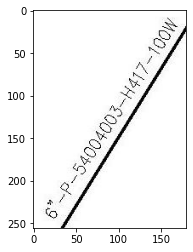

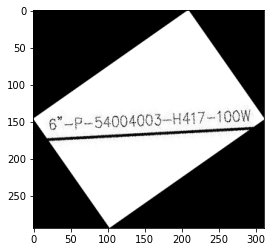

312 294


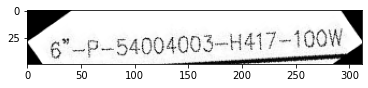

In [86]:
# img = 'f:/uhv/imgs/288dpi/cropped/word_12067.jpg'
# img = 'f:/uhv/imgs/288dpi/cropped/word_3661.jpg'
img = 'f:/uhv/imgs/288dpi/cropped/word_9802.jpg'
im = plt.imread(img)
h,w = im.shape[:2]
angle = math.degrees(math.atan2(h,w))
print(f'angle={angle}')
plt.imshow(im)
plt.show()
new_im = rotation(im,round(-angle))
plt.imshow(new_im)
plt.show()
# plt.imsave(os.path.join('/mnt/f/uhv/outputs/textrecog','word_12067.jpg'),new_im)
h1,w1 = new_im.shape[:2]
print(w1,h1)
new_im1 = new_im[h1//2-30:h1//2+20, 0:w1]
plt.imshow(new_im1)
plt.show()

In [11]:
import matplotlib.pyplot as plt
import math

angle=8.806792694435307


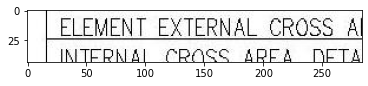

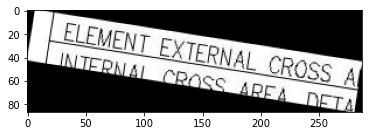

287 87


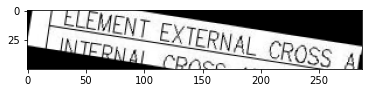

In [21]:
# img = 'f:/uhv/imgs/288dpi/cropped/word_12067.jpg'
# img = 'f:/uhv/imgs/288dpi/cropped/word_3661.jpg'
img = '/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/288dpi/cropped/word_9802.jpg'
im = plt.imread(img)
h,w = im.shape[:2]
angle = math.degrees(math.atan2(h,w))
print(f'angle={angle}')
plt.imshow(im)
plt.show()
new_im = rotation(im,round(-angle))
plt.imshow(new_im)
plt.show()
# plt.imsave(os.path.join('/mnt/f/uhv/outputs/textrecog','word_12067.jpg'),new_im)
h1,w1 = new_im.shape[:2]
print(w1,h1)
new_im1 = new_im[h1//2-30:h1//2+20, 0:w1]
plt.imshow(new_im1)
plt.show()

angle=54.887988815577806


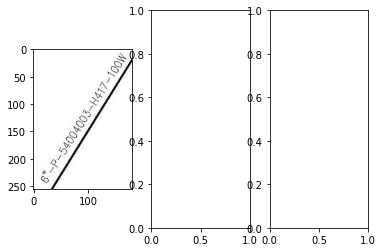

312 294


NameError: name 'ax2' is not defined

In [104]:
# img = 'f:/uhv/imgs/288dpi/cropped/word_12067.jpg'
# img = 'f:/uhv/imgs/288dpi/cropped/word_3661.jpg'
img = 'f:/uhv/imgs/288dpi/cropped/word_9802.jpg'
im = plt.imread(img)
h,w = im.shape[:2]
angle = math.degrees(math.atan2(h,w))
print(f'angle={angle}')

fig, ax = plt.subplots(1, 3) 
ax[0].imshow(im)
plt.show()
new_im = rotation(im,round(-angle))
ax[1].imshow(new_im)
plt.show()
# plt.imsave(os.path.join('/mnt/f/uhv/outputs/textrecog','word_12067.jpg'),new_im)
h1,w1 = new_im.shape[:2]
print(w1,h1)
new_im1 = new_im[h1//2-30:h1//2+20, 0:w1]
[ax2].imshow(new_im1)
plt.show()

In [92]:
img_files[180:190]

['1802-P-01-53-007-3-Z-Model.jpg',
 '1802-P-01-53-008-Model.jpg',
 '1802-P-01-53-009-3-Z-Model.jpg',
 '1802-P-01-53-010-1_Z-Model.jpg',
 '1802-P-01-53-011 2020-Model.jpg',
 '1802-P-01-53-012-Model.jpg',
 '1802-P-01-53-013-Model.jpg',
 '1802-P-01-53-014-3-Z-Model.jpg',
 '1802-P-01-53-015-3-Z-Model.jpg',
 '1802-P-01-53-016-Model.jpg']

In [80]:
#11.2 add augmentation
import math, cv2
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
st0 = pd.Timestamp.now()
dpi = 288
img_dir = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/{dpi}dpi'
ann_dir = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/annotations/{dpi}dpi'
img_dst = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/{dpi}dpi/cropped'
ann_dst = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/annotations/{dpi}dpi/cropped'
rmmk(img_dst)
rmmk(ann_dst)
count = 0
ann_crop_df_merge = pd.DataFrame()
img_files = [ f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir,f)) ]
img_files.sort()
ann_files = [ f for f in os.listdir(ann_dir) if os.path.isfile(os.path.join(ann_dir,f)) ]
ann_files.sort()
# for img,ann in tqdm(zip(img_files,ann_files)):
for iter in tqdm(range(len(img_files))):
    img_path = os.path.join(img_dir,img_files[iter])
    im = plt.imread(img_path)
    ann_df = pd.read_excel(os.path.join(ann_dir,ann_files[iter]))
    ann_df = ann_df[ann_df.text != '###']
    for i in range(len(ann_df)):
        count += 1
        # print(count)
        y0 = ann_df.iloc[i].tly
        y1 = ann_df.iloc[i].bry
        x0 = ann_df.iloc[i].tlx
        x1 = ann_df.iloc[i].brx
        crop = im[y0:y1,x0:x1]
        h = y1-y0
        w = x1-x0
        angle_min = 20 # angle <= 20 degree change angle to 0 degree
        angle_max = 70 # angle >= 70 degree change angle to 90 degree
        angle0 = math.degrees(math.atan2(h,w))
        angle = 0 if angle0<=angle_min else 90 if angle0>=angle_max else round(angle0)

        dst_crop_path = os.path.join(img_dst,f'word_{count}.jpg')
        plt.imsave(dst_crop_path, crop, dpi=dpi)        
        ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'word_{count}.jpg',name='filename'),pd.Series(ann_df.iloc[i].text.strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0,name='angle0'),pd.Series(angle,name='angle')],axis=1))
        ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)


        if angle0 >= angle_max:
            crop_rotated = cv2.rotate(crop, cv2.ROTATE_90_CLOCKWISE)
            suffix = '_cw'
            dst_crop_path = os.path.join(img_dst,f'word_{count}{suffix}.jpg')
            plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)        
            ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'word_{count}{suffix}.jpg',name='filename'),pd.Series(ann_df.iloc[i].text.strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0-90,name='angle0'),pd.Series(angle-90,name='angle')],axis=1))
            ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)        
        elif angle0 <= angle_min:
            crop_rotated = cv2.rotate(crop, cv2.ROTATE_90_COUNTERCLOCKWISE)
            suffix = '_ccw'
            dst_crop_path = os.path.join(img_dst,f'word_{count}{suffix}.jpg')
            plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)
            ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'word_{count}{suffix}.jpg',name='filename'),pd.Series(ann_df.iloc[i].text.strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0+90,name='angle0'),pd.Series(angle+90,name='angle')],axis=1))
            ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df) 
        else:
            new_im = rotation(crop,round(-angle))
            h1,w1 = new_im.shape[:2]
            crop_rotated = new_im[h1//2-30:h1//2+20, 0:w1]
            suffix = f'_{round(angle)}'
            dst_crop_path = os.path.join(img_dst,f'word_{count}{suffix}.jpg')            
            plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)
            ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'word_{count}{suffix}.jpg',name='filename'),pd.Series(ann_df.iloc[i].text.strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0+90,name='angle0'),pd.Series(angle+90,name='angle')],axis=1))
            ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)             

    ann_crop_df_merge.reset_index(drop=True,inplace=True)
    ann_crop_df_merge.to_excel(os.path.join(ann_dst,'label.xlsx'),index=False)
print(f'Time2Run: {pd.Timestamp.now()-st0}')


  0%|          | 0/455 [00:00<?, ?it/s]

Time2Run: 0 days 00:11:09.039693


In [31]:
ann_dir = f'F:/uhv/all_units/annotations/288dpi/all'
annot_all = pd.read_excel(os.path.join(ann_dir,'annot_all.xlsx'),sheet_name='allText')
annot_all

,tlx,tly,trx,try,brx,bry,blx,bly,text,pipe,unit,name,len
0,556,36,588,36,588,72,556,72,2,False,unit01,9999-P-01-01-001-Model,1
1,840,36,868,36,868,72,840,72,3,False,unit01,9999-P-01-01-001-Model,1
2,3372,36,3412,36,3412,72,3372,72,12,False,unit01,9999-P-01-01-001-Model,2
3,3656,36,3696,36,3696,72,3656,72,13,False,unit01,9999-P-01-01-001-Model,2
4,3936,36,3976,36,3976,72,3936,72,14,False,unit01,9999-P-01-01-001-Model,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382018,4504,2264,4544,2264,4544,2300,4504,2300,NW,False,unit80,1812-P-01-80-371-1_Z-Model,2
382019,4624,2264,4660,2264,4660,2300,4624,2300,WT,False,unit80,1812-P-01-80-371-1_Z-Model,2
382020,4664,2264,4700,2264,4700,2300,4664,2300,TT,False,unit80,1812-P-01-80-371-1_Z-Model,2
382021,2348,1132,2388,1132,2388,1176,2348,1176,"2""",False,unit80,1812-P-01-80-371-1_Z-Model,2


In [37]:
files[0]

'1801-P-01-51-009-Model.jpg'

In [40]:
ann_df.iloc[[0]]

,tlx,tly,trx,try,brx,bry,blx,bly,text,pipe,unit,name,len
10413,556,36,588,36,588,72,556,72,2,False,unit51,1801-P-01-51-009-Model,1


In [ ]:
def find_angle(image_path):
    import numpy as np
    image = image_path
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    return angle

In [35]:
import pandas as pd
ann_dir = f'./annotations/288dpi/all'
# annot_all = pd.read_excel(os.path.join(ann_dir,'annot_all.xlsx'),sheet_name='allText')
annot_all = pd.read_excel(os.path.join(ann_dir,'annot_all.xlsx'))

def rotation(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))
    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR, borderValue=(255,255,255))
    return outImg

def find_angle(image_path):
    import numpy as np
    image = image_path
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    return angle    

def rmmk(dir): # remove exiting folder and remake folder
    import os
    import shutil

    if os.path.exists(dir):
        shutil.rmtree(dir)
    os.makedirs(dir)

In [36]:
#11.3 crop แล้ว หมุนภาพลงมานอนอย่างเดียว ไม่หมุนตั้งกลับขึ้นไป หามุมแบบ opencv
import math, cv2
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
st0 = pd.Timestamp.now()
dpi = 288
img_dir = f'./images/{dpi}dpi'
ann_dir = f'./annotations/{dpi}dpi/all'
img_dst = f'./images/{dpi}dpi/cropped'
ann_dst = f'./annotations/{dpi}dpi/cropped'
rmmk(img_dst)
rmmk(ann_dst)
# count = 0
ann_crop_df_merge = pd.DataFrame()
img_files = [ f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir,f)) ]
img_files.sort()
# annot_all = pd.read_excel(os.path.join(ann_dir,'annot_all.xlsx'),sheet_name='allText')
for iter in tqdm(range(len(img_files))):
    img_path = os.path.join(img_dir,img_files[iter])
    im = plt.imread(img_path)
    ann_df = annot_all[annot_all.name==img_files[iter][:-4]]
    count = 0
    for i in range(len(ann_df)):
        count += 1
        # print(count)
        y0 = ann_df.iloc[i].tly
        y1 = ann_df.iloc[i].bry
        x0 = ann_df.iloc[i].tlx
        x1 = ann_df.iloc[i].brx
        crop = im[y0:y1,x0:x1]
        h = y1-y0
        w = x1-x0
        angle_min = 40 # angle <= 20 degree change angle to 0 degree
        angle_max = 52 # angle >= 65 degree change angle to 90 degree
        angle0 = math.degrees(math.atan2(h,w))
        angle = 0 if angle0<=angle_min else 90 if angle0>=angle_max else round(angle0)
        prefix = ann_df.unit.iloc[0]+'_'+ ('pipe' if ann_df['pipe'].iloc[i] else 'notpipe') + '_'+ann_df.name.iloc[0]

        if crop.shape[0]>24 and crop.shape[1]>24:
            if angle0 >= angle_max and crop.shape[1]>=32:
                crop_rotated = cv2.rotate(crop, cv2.ROTATE_90_CLOCKWISE)
                suffix = '_cw'
                dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}{suffix}.jpg')
                plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)        
                ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}{suffix}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0-90,name='angle0'),pd.Series(angle-90,name='angle')],axis=1))
                ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)        
            elif angle0 <= angle_min:
                dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}.jpg')
                plt.imsave(dst_crop_path, crop, dpi=dpi)        
                ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0,name='angle0'),pd.Series(angle,name='angle')],axis=1))
                ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)
            else:
                if ann_df.iloc[i]['pipe'] == False and crop.shape[0]<50 and crop.shape[1]<50:
                    dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}.jpg')
                    plt.imsave(dst_crop_path, crop, dpi=dpi)        
                    ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0,name='angle0'),pd.Series(angle,name='angle')],axis=1))
                    ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)
                else:
                    angle = -1*find_angle(crop)
                    new_im = rotation(crop,round(-angle))
                    h1,w1 = new_im.shape[:2]
                    # crop_rotated = new_im[h1//2-30:h1//2+20, 0:w1]
                    crop_rotated = new_im
                    if crop_rotated.shape[0]>0:
                        suffix = f'_{round(angle)}_r'
                        dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}{suffix}.jpg')
                        plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)
                        ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}{suffix}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0+90,name='angle0'),pd.Series(angle+90,name='angle')],axis=1))
                        ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)   
                     
    ann_crop_df_merge.reset_index(drop=True,inplace=True)
    ann_crop_df_merge.to_excel(os.path.join(ann_dst,'label.xlsx'),index=False)
print(f'Time2Run: {pd.Timestamp.now()-st0}')


  0%|          | 0/917 [00:00<?, ?it/s]

Time2Run: 0 days 05:04:04.633314


In [ ]:
#11.3 crop แล้ว หมุนภาพลงมานอนอย่างเดียว ไม่หมุนตั้งกลับขึ้นไป แบบเดิมใช้การหามุมจาก arctan(y/x)
import math, cv2
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
st0 = pd.Timestamp.now()
dpi = 288
img_dir = f'./images/{dpi}dpi'
ann_dir = f'./annotations/{dpi}dpi/all'
img_dst = f'./images/{dpi}dpi/cropped'
ann_dst = f'./annotations/{dpi}dpi/cropped'
rmmk(img_dst)
rmmk(ann_dst)
# count = 0
ann_crop_df_merge = pd.DataFrame()
img_files = [ f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir,f)) ]
img_files.sort()
# annot_all = pd.read_excel(os.path.join(ann_dir,'annot_all.xlsx'),sheet_name='allText')
for iter in tqdm(range(len(img_files))):
    img_path = os.path.join(img_dir,img_files[iter])
    im = plt.imread(img_path)
    ann_df = annot_all[annot_all.name==img_files[iter][:-4]]
    count = 0
    for i in range(len(ann_df)):
        count += 1
        # print(count)
        y0 = ann_df.iloc[i].tly
        y1 = ann_df.iloc[i].bry
        x0 = ann_df.iloc[i].tlx
        x1 = ann_df.iloc[i].brx
        crop = im[y0:y1,x0:x1]
        h = y1-y0
        w = x1-x0
        angle_min = 40 # angle <= 20 degree change angle to 0 degree
        angle_max = 52 # angle >= 65 degree change angle to 90 degree
        angle0 = math.degrees(math.atan2(h,w))
        angle = 0 if angle0<=angle_min else 90 if angle0>=angle_max else round(angle0)
        prefix = ann_df.unit.iloc[0]+'_'+ ('pipe' if ann_df['pipe'].iloc[i] else 'notpipe') + '_'+ann_df.name.iloc[0]

        if crop.shape[0]>24 and crop.shape[1]>24:
            if angle0 >= angle_max and crop.shape[1]>=32:
                crop_rotated = cv2.rotate(crop, cv2.ROTATE_90_CLOCKWISE)
                suffix = '_cw'
                dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}{suffix}.jpg')
                plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)        
                ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}{suffix}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0-90,name='angle0'),pd.Series(angle-90,name='angle')],axis=1))
                ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)        
            elif angle0 <= angle_min:
                dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}.jpg')
                plt.imsave(dst_crop_path, crop, dpi=dpi)        
                ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0,name='angle0'),pd.Series(angle,name='angle')],axis=1))
                ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)
                # crop_rotated = cv2.rotate(crop, cv2.ROTATE_90_COUNTERCLOCKWISE)
                # suffix = '_ccw'
                # dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}{suffix}.jpg')
                # plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)
                # ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}{suffix}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0+90,name='angle0'),pd.Series(angle+90,name='angle')],axis=1))
                # ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df) 
            else:
                if ann_df.iloc[i]['pipe'] == False and crop.shape[0]<50 and crop.shape[1]<50:
                    dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}.jpg')
                    plt.imsave(dst_crop_path, crop, dpi=dpi)        
                    ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0,name='angle0'),pd.Series(angle,name='angle')],axis=1))
                    ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)
                else:
                    new_im = rotation(crop,round(-angle))
                    h1,w1 = new_im.shape[:2]
                    crop_rotated = new_im[h1//2-30:h1//2+20, 0:w1]
                    if crop_rotated.shape[0]>0:
                        suffix = f'_{round(angle)}_r'
                        dst_crop_path = os.path.join(img_dst,f'{prefix}_{count}{suffix}.jpg')
                        plt.imsave(dst_crop_path, crop_rotated, dpi=dpi)
                        ann_crop_df = pd.DataFrame(pd.concat([pd.Series(f'{prefix}_{count}{suffix}.jpg',name='filename'),pd.Series(str(ann_df.iloc[i].text).strip(),name='text'),pd.Series(img_files[iter],name='file'),pd.Series(angle0+90,name='angle0'),pd.Series(angle+90,name='angle')],axis=1))
                        ann_crop_df_merge = ann_crop_df_merge.append(ann_crop_df)   
                     
    ann_crop_df_merge.reset_index(drop=True,inplace=True)
    ann_crop_df_merge.to_excel(os.path.join(ann_dst,'label.xlsx'),index=False)
print(f'Time2Run: {pd.Timestamp.now()-st0}')


In [24]:
ann_df.unit.iloc[0]+'_'+ ('pipe' if ann_df['pipe'].iloc[i] else 'notpipe') + '_'+ann_df.name.iloc[0]

'unit51_notpipe_1801-P-01-51-016-Model'

In [ ]:
prefix

'notpipe_1801-P-01-51-016-Model'

(36, 28, 3)


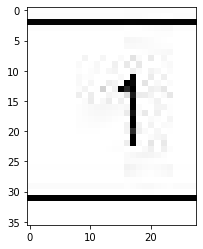

In [28]:
im = plt.imread("F:/uhv/all_units/images/288dpi/cropped/unit51_1801-P-01-51-009-Model_8.jpg")
print(im.shape)
plt.imshow(im)

(24, 24, 3)


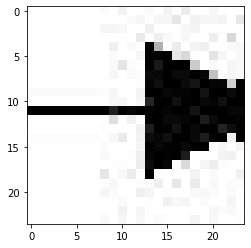

In [31]:
im = plt.imread("F:/uhv/all_units/images/288dpi/cropped/unit51_1801-P-01-51-009-Model_469.jpg")
print(im.shape)
plt.imshow(im)

(24, 24, 3)


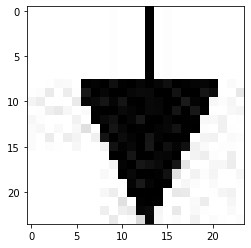

In [ ]:
im = plt.imread("F:/uhv/all_units/images/288dpi/cropped/unit51_1801-P-01-51-009-Model_428.jpg")
print(im.shape)
plt.imshow(im)

In [2]:
pwd

'/home/adminroot/data/project/mmocr_setting_pid/dataprep_uhv_all_units'

(36, 72, 3)


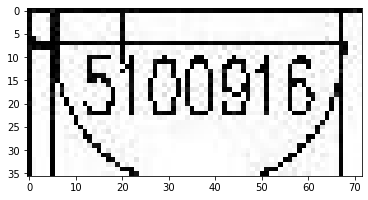

In [4]:
import matplotlib.pyplot as plt
im = plt.imread("./images/288dpi/cropped/unit51_notpipe_1801-P-01-51-009-Model_427.jpg")
print(im.shape)
plt.imshow(im)

(52, 36, 3)


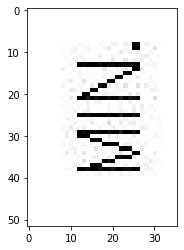

In [27]:
im = plt.imread("F:/uhv/all_units/images/288dpi/cropped/unit51_1801-P-01-51-009-Model_353.jpg")
print(im.shape)
plt.imshow(im)

In [35]:
ann_df.iloc[[i]],suffix

(         tlx   tly   trx   try   brx   bry   blx   bly  \
 327705  3380  3272  3436  3272  3436  3300  3380  3300   
 
                             text  pipe    unit                    name  len  
 327705  1-1/2"-SAH-74523003-A112  True  unit74  1812-P-01-74-520-Model   24  ,
 '_27')

(28, 56, 3)


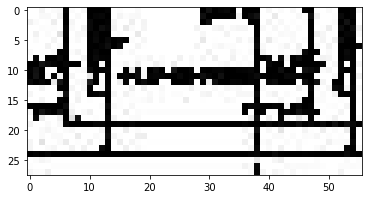

In [32]:
plt.imshow(crop)
print(crop.shape)

(50, 62, 3)

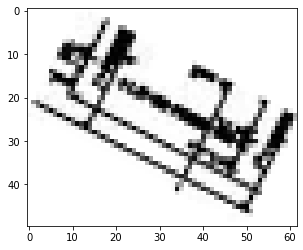

In [38]:
plt.imshow(new_im)
new_im.shape

In [39]:
crop_rotated.shape

(0, 62, 3)

In [37]:
plt.imsave(dst_crop_path, crop_rotated)

SystemError: tile cannot extend outside image

In [86]:
ann_files[-5:]

['9999-P-01-01-037-Model.xlsx',
 '9999-P-01-01-038-Model.xlsx',
 '9999-P-01-01-039-Model.xlsx',
 '9999-P-01-01-040-Model.xlsx',
 '9999-P-01-01-041-Model.xlsx']

In [87]:
img_files[-5:]

['9999-P-01-01-037-Model.jpg',
 '9999-P-01-01-038-Model.jpg',
 '9999-P-01-01-039-Model.jpg',
 '9999-P-01-01-040-Model.jpg',
 '9999-P-01-01-041-Model.jpg']

In [81]:
ann_crop_df_merge

,filename,text,file,angle0,angle
0,word_1.jpg,"4""-LPG-51009001-B11",1801-P-01-51-009-Model.jpg,9.782407,0
1,word_1_ccw.jpg,"4""-LPG-51009001-B11",1801-P-01-51-009-Model.jpg,99.782407,90
2,word_2.jpg,"4""-LPG-51009033-B11",1801-P-01-51-009-Model.jpg,80.380272,90
3,word_2_cw.jpg,"4""-LPG-51009033-B11",1801-P-01-51-009-Model.jpg,-9.619728,0
4,word_3.jpg,"4""-CFA-51009029-B12",1801-P-01-51-009-Model.jpg,9.309940,0
...,...,...,...,...,...
24177,word_12089_ccw.jpg,"1/2""-CPL-01041013-H110-S",9999-P-01-01-041-Model.jpg,98.569142,90
24178,word_12090.jpg,"1/2""-CPL-01041014-H110-S",9999-P-01-01-041-Model.jpg,8.569142,0
24179,word_12090_ccw.jpg,"1/2""-CPL-01041014-H110-S",9999-P-01-01-041-Model.jpg,98.569142,90
24180,word_12091.jpg,"2""-CPL-01041002-H110-50W",9999-P-01-01-041-Model.jpg,8.343892,0


In [88]:
#12.1
# Random Text Recognition for train/test
import os
import shutil
import random
import csv
import numpy as np
import pandas as pd

dpi = 288
crop_src = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/imgs/{dpi}dpi/cropped'
# crop_dst_train = 'F:/uhv/imgs/{dpi}dpi/cropped/training_word_images_gt'
# crop_dst_test = 'F:/uhv/imgs/{dpi}dpi/cropped/test_word_images_gt'
ann_src = f'/home/adminroot/data/project/mmocr_setting_pid/preprocessing/annotations/{dpi}dpi/cropped/label.xlsx'
# ann_dst = 'F:/uhv/annotations/{dpi}dpi/cropped'

ann_dst = '/home/adminroot/data/project/textrecog'
crop_dst_train = ann_dst + '/train'
crop_dst_test = ann_dst + '/test'

rmmk(ann_dst)
rmmk(crop_dst_train)
rmmk(crop_dst_test)

ann_crop_df_merge = pd.read_excel(ann_src, usecols=[0,1])
train_files = pd.DataFrame()
test_files = pd.DataFrame()

crop_files = [ f for f in os.listdir(crop_src) if os.path.isfile(os.path.join(crop_src,f)) ]
crop_files.sort()
qty = len(crop_files)
pct_tr = 0.8 # Percentage of training
i=0
random.shuffle(crop_files)
for f in tqdm(crop_files[:int(qty*pct_tr)]):
    # print(f)
    shutil.copy(os.path.join(crop_src,f),os.path.join(crop_dst_train,f))
    train_files = train_files.append(pd.Series(f),ignore_index=True)
    # i += 1
    # print(i,f)
    # train_label.txt
for f in crop_files[int(qty*pct_tr):]:
    # print(f)
    shutil.copy(os.path.join(crop_src,f),os.path.join(crop_dst_test,f))
    test_files = test_files.append(pd.Series(f),ignore_index=True)
train_files.columns = ['filename']
test_files.columns = ['filename'] 
train_df = ann_crop_df_merge.merge(train_files,on='filename',how='right')
test_df = ann_crop_df_merge.merge(test_files,on='filename',how='right')
# train_df.to_csv(os.path.join(ann_dst,'train_label.txt'),sep=',',header=False,index=False,quoting=csv.QUOTE_NONE)
# test_df.to_csv(os.path.join(ann_dst,'test_label.txt'),sep=',',header=False,index=False,quoting=csv.QUOTE_NONE)
# train_df.to_json(os.path.join(ann_dst,'train_label.jsonl'),orient='records',lines=True)
# test_df.to_json(os.path.join(ann_dst,'test_label.jsonl'),orient='records',lines=True)

  0%|          | 0/19345 [00:00<?, ?it/s]

In [89]:
#13 สร้าง txt สำหรับ textrecog โดยอ้างอิง ann_dst จาก#12
def gen_txt(src,dst):
    txt = src.values.tolist()
    with open(os.path.join(ann_dst,dst), 'w', encoding ='utf8') as txt_file:
        for txt in txt:
            txt_data = f'{txt[0]} {txt[1]}'
            txt_file.write(txt_data+'\n')
gen_txt(test_df,'test_label.txt')
gen_txt(train_df,'train_label.txt')

In [90]:
#14 สร้าง jsonl สำหรับ textrecog โดยอ้างอิง ann_dst จาก#12
def gen_jsonl(src,dst):
    import json
    jsonl = src.to_dict(orient='records')
    with open(os.path.join(ann_dst,dst), 'w', encoding ='utf8') as json_file:
        for j in jsonl:
            json_data = json.dumps(j).replace('/','\/')
            json_file.write(json_data+'\n')
gen_jsonl(test_df,'test_label.jsonl')
gen_jsonl(train_df,'train_label.jsonl')
    